In [21]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    
    df["pospercent"] = df.pos / df.total
    
    df.pos = df.pos.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = (df.XRP_price - df.XRP_price.shift(-1)).shift(1)

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','labels','pos','neg','time','dom'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

## Day

In [23]:
day = read_and_clean_data("data/full_day.csv")

day_train, day_test = train_test_split(day, test_size = 0.25, random_state = 123)
day_train, day_test = day_train.reset_index(drop = True), day_test.reset_index(drop = True)
day.head(5)

,total,pospercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,283,0.798587,-703.00,-0.9075,-0.2600,2.46825,0.00015
1,264,0.696970,156.75,0.0000,0.0000,-1.27750,-0.00020
2,262,0.801527,67.75,-2.0350,0.2000,3.14575,0.00015
3,288,0.750000,437.50,3.4050,-0.7550,12.81750,0.00015
4,290,0.724138,1042.75,3.8450,-0.6375,12.03250,0.00005


In [24]:
daysetup = setup(data = day_train, target = 'change', silent = True)

,Description,Value
0,session_id,3515
1,Target,change
2,Original Data,"(39, 7)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(27, 6)"


In [25]:
best_model_day = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,0.0002,0.0000,0.0003,-0.9741,0.0003,1.0000,0.0020
llar,Lasso Least Angle Regression,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.0020
omp,Orthogonal Matching Pursuit,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.0020
en,Elastic Net,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.0030
dummy,Dummy Regressor,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.0020
lightgbm,Light Gradient Boosting Machine,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.2500
lasso,Lasso Regression,0.0002,0.0000,0.0003,-1.2478,0.0002,1.0666,0.0020
knn,K Neighbors Regressor,0.0002,0.0000,0.0003,-1.6542,0.0002,1.4029,0.0030
rf,Random Forest Regressor,0.0003,0.0000,0.0003,-2.2607,0.0002,1.3525,0.0220
huber,Huber Regressor,0.0003,0.0000,0.0003,-2.4452,0.0002,1.5354,0.0030


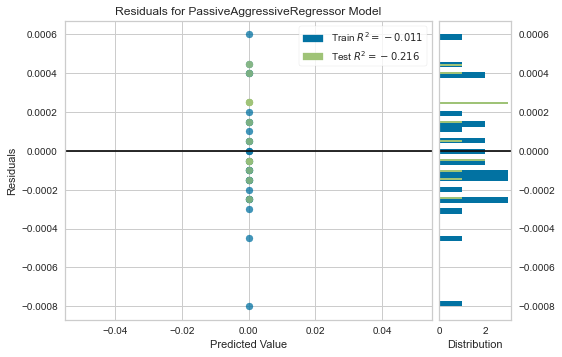

In [26]:
plot_model(best_model_day)

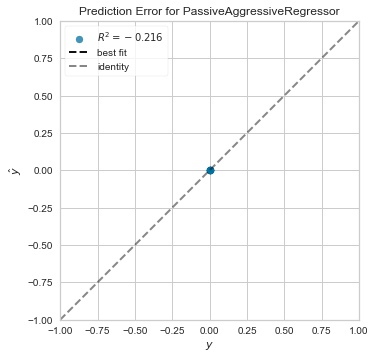

In [27]:
plot_model(best_model_day, plot = 'error')

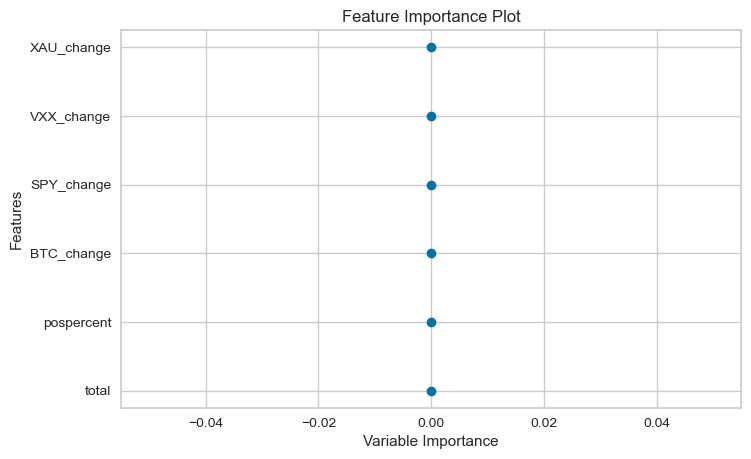

In [28]:
plot_model(best_model_day, plot='feature')

In [29]:
finalize_model(best_model_day)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=3515, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
pred = predict_model(best_model_day, data=day_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,0.0002,0.0000,0.0003,-0.0929,0.0003,1.0000


<AxesSubplot:>

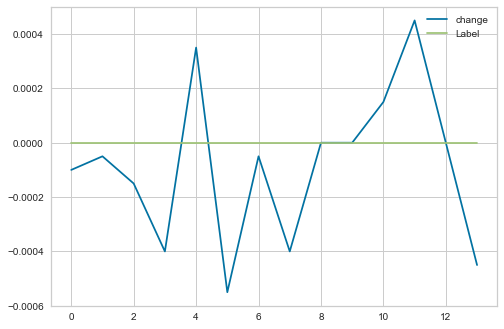

In [31]:
pred[['change', 'Label']].plot()

## Hour

In [32]:
hour = read_and_clean_data("data/full_hour.csv")
hour_train, hour_test = train_test_split(hour, test_size = 0.25, random_state = 42)
hour_train, hour_test = hour_train.reset_index(drop = True), hour_test.reset_index(drop = True)

hour.head(5)

,total,pospercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,6,0.666667,7.00,0.0,0.0,-0.17575,-0.00020
1,5,0.800000,-601.00,0.0,0.0,1.05325,0.00350
2,21,0.904762,-548.75,0.0,0.0,0.48325,0.00440
3,22,0.909091,19.50,0.0,0.0,-1.01825,-0.00495
4,8,0.750000,-91.50,0.0,0.0,-1.34650,-0.01245


In [33]:
hoursetup = setup(data = hour_train, target = 'change', silent = True)

,Description,Value
0,session_id,4852
1,Target,change
2,Original Data,"(927, 7)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(648, 6)"


In [34]:
best_model_hour = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0035,0.0000,0.0050,-0.0221,0.0047,1.1984,0.0030
lar,Least Angle Regression,0.0035,0.0000,0.0050,-0.0221,0.0047,1.1983,0.0030
ridge,Ridge Regression,0.0035,0.0000,0.0050,-0.0220,0.0047,1.1742,0.0020
en,Elastic Net,0.0035,0.0000,0.0050,-0.0144,0.0048,1.0456,0.0030
par,Passive Aggressive Regressor,0.0035,0.0000,0.0049,-0.0119,0.0049,1.0000,0.0020
lasso,Lasso Regression,0.0035,0.0000,0.0050,-0.0144,0.0048,1.0456,0.0030
omp,Orthogonal Matching Pursuit,0.0035,0.0000,0.0050,-0.0181,0.0047,1.1272,0.0020
br,Bayesian Ridge,0.0035,0.0000,0.0050,-0.0271,0.0047,1.1419,0.0030
huber,Huber Regressor,0.0035,0.0000,0.0050,-0.0233,0.0047,1.1409,0.0060
llar,Lasso Least Angle Regression,0.0035,0.0000,0.0050,-0.0144,0.0048,1.0456,0.0020


In [35]:
pred = predict_model(best_model_hour, data=hour_test)
pred = pred.rename({'change':'real', 'Label':'pred'}, axis = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0038,0.0000,0.0056,-0.0271,0.0053,1.2679


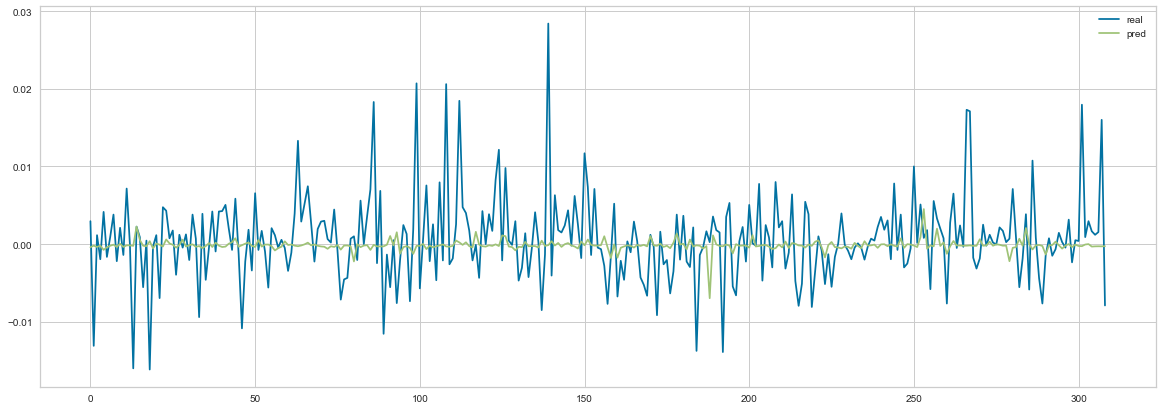

In [36]:
ax = pred[['real', 'pred']].plot(figsize = (20, 7))
fig = ax.get_figure()
fig.savefig('images/hour_pycaret_pred.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
fig.savefig('images/hour_pycaret_pred.jpg', format = "jpg", dpi = 300,bbox_inches='tight')

In [37]:
plot_model(best_model_hour, plot = 'residuals', save = True)

'Residuals.png'

In [38]:
plot_model(best_model_hour, plot = 'feature', save = True)

'Feature Importance.png'

## Minute

In [39]:
minute = read_and_clean_data("data/full_minute.csv")
minute_train, minute_test = train_test_split(minute, test_size = 0.05, random_state = 42)
minute_train, minute_test = minute_train.reset_index(drop = True), minute_test.reset_index(drop = True)

minute.head(5)

,total,pospercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,2,1.0,-16.00,0.0,0.0,0.03750,0.00015
1,1,1.0,-38.25,0.0,0.0,-0.09250,-0.00020
2,2,1.0,-17.00,0.0,0.0,0.13200,0.00060
3,2,1.0,11.25,0.0,0.0,-0.00725,0.00000
4,1,1.0,-3.50,0.0,0.0,0.14675,-0.00050


In [40]:
minutesetup = setup(data = minute_train, target = 'change', silent = True, transformation = True)

,Description,Value
0,session_id,1868
1,Target,change
2,Original Data,"(8717, 7)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(6101, 14)"


In [41]:
best_model_minute = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,0.0004,0.0000,0.0007,-0.0021,0.0007,1.0000,0.0030
llar,Lasso Least Angle Regression,0.0004,0.0000,0.0007,-0.0026,0.0007,120448093.0546,0.0030
lasso,Lasso Regression,0.0004,0.0000,0.0007,-0.0026,0.0007,120448089.0009,0.0030
dummy,Dummy Regressor,0.0004,0.0000,0.0007,-0.0026,0.0007,120448089.0009,0.0030
lar,Least Angle Regression,0.0004,0.0000,0.0007,-0.0026,0.0007,215895171.8874,0.0030
en,Elastic Net,0.0004,0.0000,0.0007,-0.0026,0.0007,120448089.0009,0.0030
huber,Huber Regressor,0.0004,0.0000,0.0007,-0.0028,0.0007,326934881.3943,0.0200
omp,Orthogonal Matching Pursuit,0.0004,0.0000,0.0007,-0.0032,0.0007,198931343.1139,0.0030
br,Bayesian Ridge,0.0004,0.0000,0.0007,-0.0033,0.0007,450584593.7110,0.0030
ridge,Ridge Regression,0.0004,0.0000,0.0007,-0.0034,0.0007,451082706.0031,0.0030


In [42]:
pred = predict_model(best_model_minute, data=minute_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,0.0004,0.0000,0.0007,-0.0040,0.0007,1.0000


<AxesSubplot:>

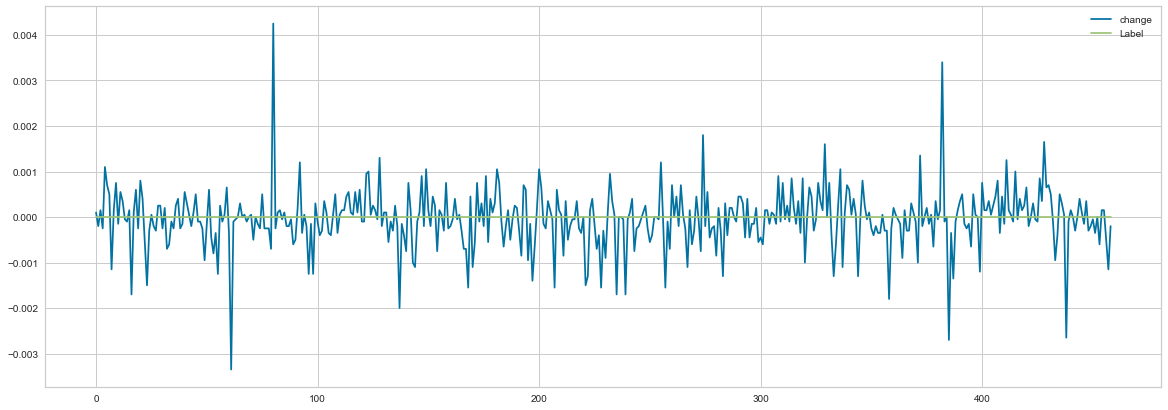

In [43]:
pred[['change', 'Label']].plot(figsize = (20, 7))